In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

x1 = np.random.normal(50, 6, 200)
print x1
y1 = np.random.normal(5, 0.5, 200)
print y1
x2 = np.random.normal(30,6,200)
print x2
y2 = np.random.normal(4,0.5,200)
print y2

x3 = np.random.normal(45,6,200)
print x3
y3 = np.random.normal(2.5, 0.5, 200)
print y3



[49.6346944  55.58267941 49.05335895 55.00160787 55.15755486 63.52802472
 41.98569215 51.44107374 44.97206982 50.08957725 55.2964077  48.48025058
 53.44893535 52.96855918 42.31910238 54.09495959 61.59099537 52.69452525
 54.7167933  47.26578283 58.22975945 49.2933707  48.89444684 49.37148041
 50.62146734 58.29454158 47.53403864 58.05825805 49.99986097 52.94312331
 52.67101873 52.20994655 44.538183   50.47222998 44.19474584 51.29123783
 48.01180907 43.59725866 49.12240224 38.80296723 39.67093929 49.29331595
 48.27564391 60.03368601 40.64159311 47.74073399 46.68188755 54.54539459
 51.23580967 44.79409016 42.72654596 55.4626164  54.46133582 53.04882349
 43.46412864 44.12656596 49.90733499 47.11662991 47.07700064 59.18706267
 47.27190314 44.92178501 48.36357593 53.38699935 41.89159938 47.23702193
 46.92259447 45.68359654 57.65331302 48.71306587 46.04944159 40.0615622
 42.02527547 58.19238792 44.53054648 51.69726075 57.57616946 42.57479728
 51.91765652 50.44285752 49.13475721 48.61871887 50.

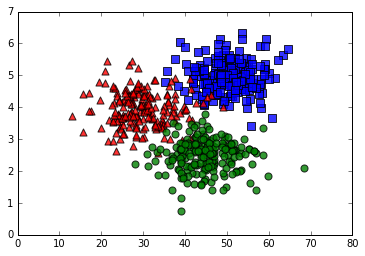

In [13]:
#Scatter Figure
plt.scatter(x1,y1,c='b',marker='s',s=50,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=50, alpha=0.8)
plt.scatter(x3,y3, c='g', s=50, alpha=0.8)

In [16]:
#把所有的 x 坐标和 y 坐标放在一起
x_val = np.concatenate((x1,x2,x3))
y_val = np.concatenate((y1,y2,y3))

[49.6346944  55.58267941 49.05335895 55.00160787 55.15755486 63.52802472
 41.98569215 51.44107374 44.97206982 50.08957725 55.2964077  48.48025058
 53.44893535 52.96855918 42.31910238 54.09495959 61.59099537 52.69452525
 54.7167933  47.26578283 58.22975945 49.2933707  48.89444684 49.37148041
 50.62146734 58.29454158 47.53403864 58.05825805 49.99986097 52.94312331
 52.67101873 52.20994655 44.538183   50.47222998 44.19474584 51.29123783
 48.01180907 43.59725866 49.12240224 38.80296723 39.67093929 49.29331595
 48.27564391 60.03368601 40.64159311 47.74073399 46.68188755 54.54539459
 51.23580967 44.79409016 42.72654596 55.4626164  54.46133582 53.04882349
 43.46412864 44.12656596 49.90733499 47.11662991 47.07700064 59.18706267
 47.27190314 44.92178501 48.36357593 53.38699935 41.89159938 47.23702193
 46.92259447 45.68359654 57.65331302 48.71306587 46.04944159 40.0615622
 42.02527547 58.19238792 44.53054648 51.69726075 57.57616946 42.57479728
 51.91765652 50.44285752 49.13475721 48.61871887 50.

In [15]:
x_diff = max(x_val)-min(x_val)
y_diff = max(y_val)-min(y_val)

In [18]:
x_normalized = [x/(x_diff) for x in x_val]
y_normalized = [y/(y_diff) for y in y_val]
xy_normalized = zip(x_normalized,y_normalized)

In [19]:
labels = [1]*200+[2]*200+[3]*200

In [20]:
clf = neighbors.KNeighborsClassifier(30)

In [21]:
clf.fit(xy_normalized, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [23]:
nearests = clf.kneighbors([(50/x_diff, 5/y_diff),(30/x_diff, 3/y_diff)], 5, False)
nearests

array([[149,  94, 103,  28, 119],
       [398, 290, 272, 344, 286]])

In [24]:
prediction = clf.predict([(50/x_diff, 5/y_diff),(30/x_diff, 3/y_diff)])
prediction

array([1, 2])

In [25]:
prediction_proba = clf.predict_proba([(50/x_diff, 5/y_diff),(30/x_diff, 3/y_diff)])
prediction_proba

array([[1.        , 0.        , 0.        ],
       [0.        , 0.83333333, 0.16666667]])

In [30]:
x1_test = np.random.normal(50, 6, 100)
y1_test = np.random.normal(5, 0.5, 100)

x2_test = np.random.normal(30,6,100)
y2_test = np.random.normal(4,0.5,100)

x3_test = np.random.normal(45,6,100)
y3_test = np.random.normal(2.5, 0.5, 100)

xy_test_normalized = zip(np.concatenate((x1_test,x2_test,x3_test))/x_diff,\
                        np.concatenate((y1_test,y2_test,y3_test))/y_diff)

labels_test = [1]*100+[2]*100+[3]*100

In [31]:
score = clf.score(xy_test_normalized, labels_test)
score

0.96

In [32]:
xx,yy = np.meshgrid(np.arange(1,70.1,0.1), np.arange(1,7.01,0.01))

In [33]:
xx_normalized = xx/x_diff
yy_normalized = yy/y_diff

In [34]:
coords = np.c_[xx_normalized.ravel(), yy_normalized.ravel()]

In [35]:
Z = clf.predict(coords)

In [36]:
Z = Z.reshape(xx.shape)

(10, 70, 1, 7)

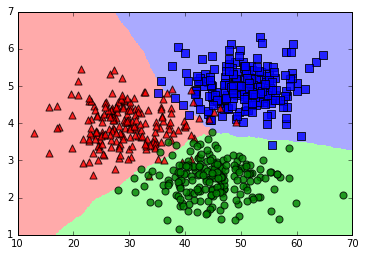

In [37]:
light_rgb = ListedColormap([ '#AAAAFF', '#FFAAAA','#AAFFAA'])
plt.pcolormesh(xx, yy,Z, cmap=light_rgb)
plt.scatter(x1,y1,c='b',marker='s',s=50,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=50, alpha=0.8)
plt.scatter(x3,y3, c='g', s=50, alpha=0.8)
plt.axis((10, 70,1,7))

In [38]:
Z_proba = clf.predict_proba(coords)

In [41]:
Z_proba_reds = Z_proba[:,1].reshape(xx.shape)

(10, 70, 1, 7)

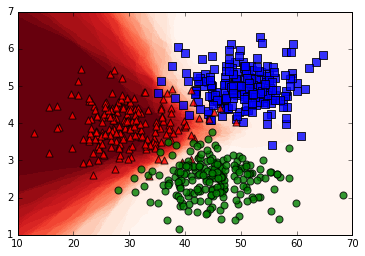

In [42]:
plt.pcolormesh(xx, yy,Z_proba_reds, cmap='Reds')
plt.scatter(x1,y1,c='b',marker='s',s=50,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=50, alpha=0.8)
plt.scatter(x3,y3, c='g', s=50, alpha=0.8)
plt.axis((10, 70,1,7))